In [48]:
import mglearn
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
from IPython.display import display
import platform

In [49]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 자연어 처리 시작하기

(http://pinkwink.kr) 

* 설치 목록
    * JDK (Java SE Downloads)
    * JAVA_HOME 설정
    * JPype 설치
    * KoNLPy 설치
    * Word Cloud 설치

## 8-1. 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

* KoNLPy : **pip install konlpy**
* JPype1 : **conda install -c conda-forge jpype1** 
    * 이후 Jupyter Notebook 재실행 필요
* JDK 설치 : Java JDK로 검색해서 OS에 맞춰 설치

    * JAVA_HOME 설정 : JDK설치후, Program FIles > Java폴더 경로 복사, 시스템설정-> 고급시스템설정-> 환경변수-> Java_Home -> 경로복사

## 8-2. 한글 자연어 처리 기초

In [50]:
from konlpy.tag import Kkma
kkma = Kkma()

In [51]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [52]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [53]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [54]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [55]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [56]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [57]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [58]:
from konlpy.tag import Twitter
t = Twitter()

/opt/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [59]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [60]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [61]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

## 8-3. 워드 클라우드

* WordCloud 설치 : **pip install wordcloud**

## 8-4. 육아휴직관련 법안 대한민국 국회 제 1809890호 의안

In [22]:
import nltk

In [23]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [24]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [25]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [26]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [27]:
print(len(ko.tokens))           # returns number of tokens (document length)
print(len(set(ko.tokens)))   # returns number of unique tokens
ko.vocab()                        # returns frequency distribution

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

findfont: Font family ['nanumGothic'] not found. Falling back to DejaVu Sans.
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 55092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matp

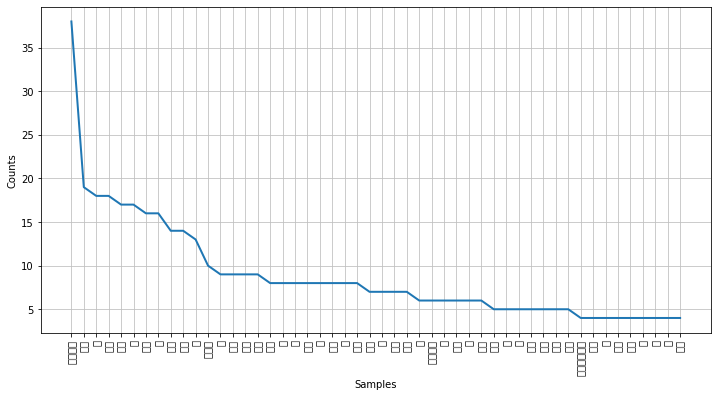

In [28]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [29]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 55092 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49373 missing from c

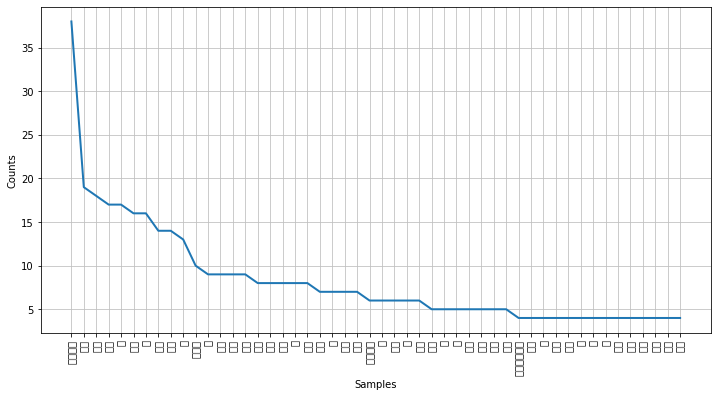

In [30]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [31]:
ko.count('초등학교')

6

findfont: Font family ['nanumGothic'] not found. Falling back to DejaVu Sans.
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matp

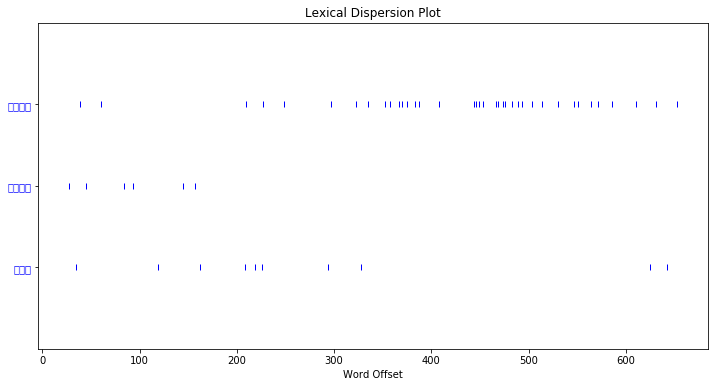

In [32]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [33]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/kyung/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

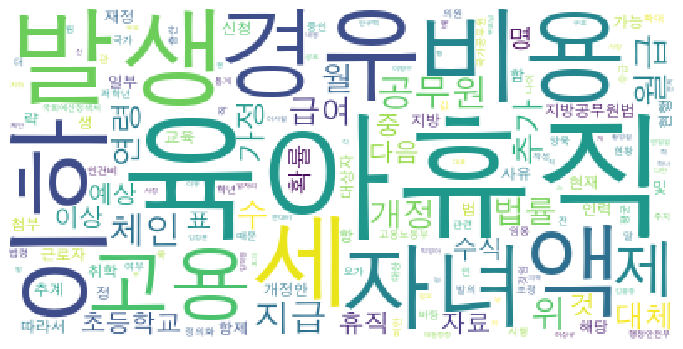

In [35]:
data = ko.vocab().most_common(150)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='Libaray/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 스마트홈

In [73]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [74]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('스마트홈')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [75]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 '  질문  스마트홈이 구축된 사회의 안좋은점   2020.07.26.   스마트 홈이 구축된 사회에는 해킹등 각종 신종범죄의 대상이 되어 재앙이라고 생각합니다.또다른 안좋은 점에는 무었이 있을까요?내공100 빠른 시간내에 부탁드립니다   답변 정전 등의 이유로 스마트홈 체계가 정지되었을 때 수동으로 동작이 불가능할 경우 위험합니다.    닉네임cwar****   ',
 '  질문  스마트 홈에 대해...   2019.11.20.   스마트 홈의 정의, 종류, 원리, 활용에 대해 알려주세요! 짧아도 괜찮습니다   답변 스마트 홈은 사물인터넷(IoT) 등을 이용해서 가정 내의... 스마트 홈 환경에서 사용 가능한 기능들은 다음과... 가능한 시스템이 구축되있는 환경이 바로 스마트 홈 입니다.    닉네임ASTRO   ',
 '  질문  집전화를 스마트홈폰으로 바꿨더니집에   2019.09.12.   집전화를 스마트홈폰으로 바꿨더니집에 전화기가 1대가 되는... 놓인 스마트홈폰만 사용이 가능해져서 많이 불편합니다.혹시 갤럭시플레이어같은 스마트홈폰에070전화기...   답변 집전화를 스마트홈폰으로 바꿨더니집에 전화기가... 놓인 스마트홈폰만 사용이 가능해져서 많이 불편합니다.혹시 갤럭시플레이어같은 스마트홈폰에070전...    닉네임vq4o****   ',
 '  질문  삼성 스마트홈 어댑터   2020.06.05.   삼성에어컨에 연결할 스마트홈 어댑터를 구매하려는데요. 어떤 제품으로... 에어컨 모델명은 AF17R7573WSN입니다. 해당되는 스마트홈 어댑터 확인부탁드립니다.   답변 안녕하세요 보유하신 모델은 WIFI가 기본 장착된 모델입니다 동글 구매없이 SmartThing

In [76]:
#from tqdm import tqdm_notebook

present_candi_text = []

for n in range(1, 1000, 10):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('스마트홈')))

    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('dl')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [79]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 '  질문  스마트홈이 구축된 사회의 안좋은점   2020.07.26.   스마트 홈이 구축된 사회에는 해킹등 각종 신종범죄의 대상이 되어 재앙이라고 생각합니다.또다른 안좋은 점에는 무었이 있을까요?내공100 빠른 시간내에 부탁드립니다   답변 정전 등의 이유로 스마트홈 체계가 정지되었을 때 수동으로 동작이 불가능할 경우 위험합니다.    닉네임cwar****   ',
 '  질문  스마트 홈에 대해...   2019.11.20.   스마트 홈의 정의, 종류, 원리, 활용에 대해 알려주세요! 짧아도 괜찮습니다   답변 스마트 홈은 사물인터넷(IoT) 등을 이용해서 가정 내의... 스마트 홈 환경에서 사용 가능한 기능들은 다음과... 가능한 시스템이 구축되있는 환경이 바로 스마트 홈 입니다.    닉네임ASTRO   ',
 '  질문  집전화를 스마트홈폰으로 바꿨더니집에   2019.09.12.   집전화를 스마트홈폰으로 바꿨더니집에 전화기가 1대가 되는... 놓인 스마트홈폰만 사용이 가능해져서 많이 불편합니다.혹시 갤럭시플레이어같은 스마트홈폰에070전화기...   답변 집전화를 스마트홈폰으로 바꿨더니집에 전화기가... 놓인 스마트홈폰만 사용이 가능해져서 많이 불편합니다.혹시 갤럭시플레이어같은 스마트홈폰에070전...    닉네임vq4o****   ',
 '  질문  삼성 스마트홈 어댑터   2020.06.05.   삼성에어컨에 연결할 스마트홈 어댑터를 구매하려는데요. 어떤 제품으로... 에어컨 모델명은 AF17R7573WSN입니다. 해당되는 스마트홈 어댑터 확인부탁드립니다.   답변 안녕하세요 보유하신 모델은 WIFI가 기본 장착된 모델입니다 동글 구매없이 SmartThing

In [80]:
len(present_candi_text)

1300

In [81]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

In [82]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [83]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '질문',
 '스마트홈',
 '이',
 '구축',
 '된',
 '사회',
 '의',
 '안좋은',
 '점',
 '2020.07',
 '.',
 '26',
 '.',
 '스마트',
 '홈',
 '이',
 '구축',
 '된',
 '사회',
 '에는',
 '해킹',
 '등',
 '각종',
 '신종',
 '범죄',
 '의',
 '대상',
 '이',
 '되어',
 '재앙',
 '이라고',
 '생각',
 '합니다',
 '.',
 '또다른',
 '안좋은',
 '점',
 '에는',
 '무었',
 '이',
 '있을까요',
 '?',
 '내공',
 '100',
 '빠른',
 '시간',
 '내',
 '에',
 '부탁드립니다',
 '답변',
 '정전',
 '등',
 '의',
 '이유',
 '로',
 '스마트홈',
 '체계',
 '가',
 '정지',
 '되었을',
 '때',
 '수동',
 '으로',
 '동작',
 '이',
 '불가능할',
 '경우',
 '위험합니다',
 '.',
 '닉네임',
 'cwar',
 '****',
 '질문',
 '스마트',
 '홈',
 '에',
 '대해',
 '...',
 '2019.11',
 '.',
 '20',
 '.

In [84]:
ko = nltk.Text(tokens_ko, name='스마트홈')
print(len(ko.tokens))
print(len(set(ko.tokens)))

88022
426


In [85]:
ko = nltk.Text(tokens_ko, name='스마트홈')
ko.vocab().most_common(100)

[('.', 4772),
 ('스마트홈', 2942),
 ('에', 2172),
 ('...', 1958),
 ('이', 1786),
 ('를', 1514),
 ('집', 1500),
 ('폰', 1500),
 ('가', 1314),
 ('질문', 1100),
 ('으로', 1100),
 ('답변', 1000),
 ('닉네임', 1000),
 ('사용', 986),
 (',', 758),
 ('스마트', 730),
 ('홈', 730),
 ('의', 686),
 ('로', 614),
 ('?', 600),
 ('을', 600),
 ('전화', 600),
 ('바꿨더니', 600),
 ('전화기', 600),
 ('입니다', 586),
 ('검색', 500),
 ('단어', 500),
 ('같은', 500),
 ('제어', 500),
 ('은', 472),
 ('는', 414),
 ('된', 400),
 ('하는', 400),
 ('부탁드립니다', 400),
 ('놓인', 400),
 ('만', 400),
 ('가능해져서', 400),
 ('많이', 400),
 ('불편합니다', 400),
 ('혹시', 400),
 ('갤럭시', 400),
 ('플레이어', 400),
 ('070', 400),
 ('안녕하세요', 400),
 ('-', 400),
 ('+', 400),
 ('cctv', 400),
 ('다음', 386),
 ('****', 314),
 ('1', 314),
 ('되는', 314),
 ('입력', 300),
 ('/', 300),
 ('때', 300),
 ('합니다', 300),
 ('내', 300),
 ('어댑터', 300),
 ('모델', 300),
 ('어플', 300),
 ('07', 300),
 ('고', 300),
 ('티켓', 300),
 ('복사', 300),
 ('해서', 286),
 ('구축', 286),
 ('등', 286),
 ('사물인터넷', 286),
 ('기능', 286),
 ('들', 286),
 ('과', 286),

In [87]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='스마트홈')
ko.vocab().most_common(50)

[('스마트홈', 2942),
 ('집', 1500),
 ('폰', 1500),
 ('닉네임', 1000),
 ('사용', 986),
 ('스마트', 730),
 ('홈', 730),
 ('전화', 600),
 ('바꿨더니', 600),
 ('전화기', 600),
 ('입니다', 586),
 ('검색', 500),
 ('같은', 500),
 ('제어', 500),
 ('된', 400),
 ('부탁드립니다', 400),
 ('놓인', 400),
 ('만', 400),
 ('가능해져서', 400),
 ('많이', 400),
 ('불편합니다', 400),
 ('혹시', 400),
 ('갤럭시', 400),
 ('플레이어', 400),
 ('070', 400),
 ('안녕하세요', 400),
 ('-', 400),
 ('+', 400),
 ('cctv', 400),
 ('다음', 386),
 ('****', 314),
 ('되는', 314),
 ('입력', 300),
 ('/', 300),
 ('합니다', 300),
 ('내', 300),
 ('어댑터', 300),
 ('모델', 300),
 ('어플', 300),
 ('07', 300),
 ('티켓', 300),
 ('복사', 300),
 ('해서', 286),
 ('구축', 286),
 ('등', 286),
 ('사물인터넷', 286),
 ('기능', 286),
 ('대해', 272),
 ('전', 214),
 ('구매', 214)]

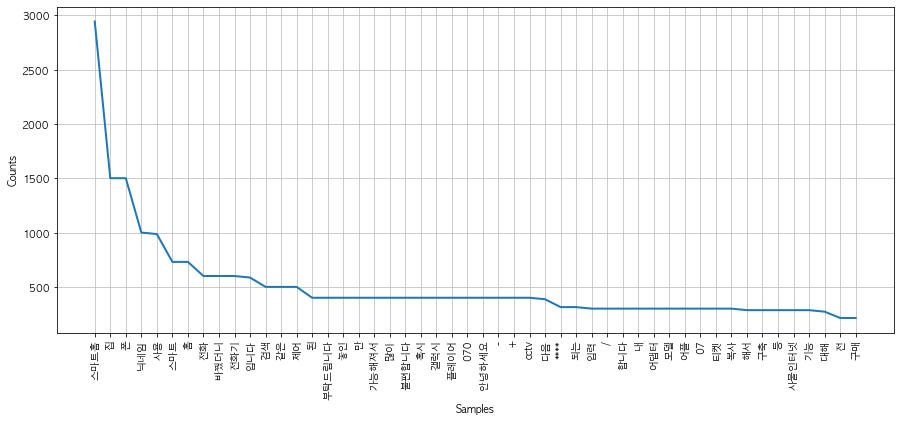

In [88]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [89]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

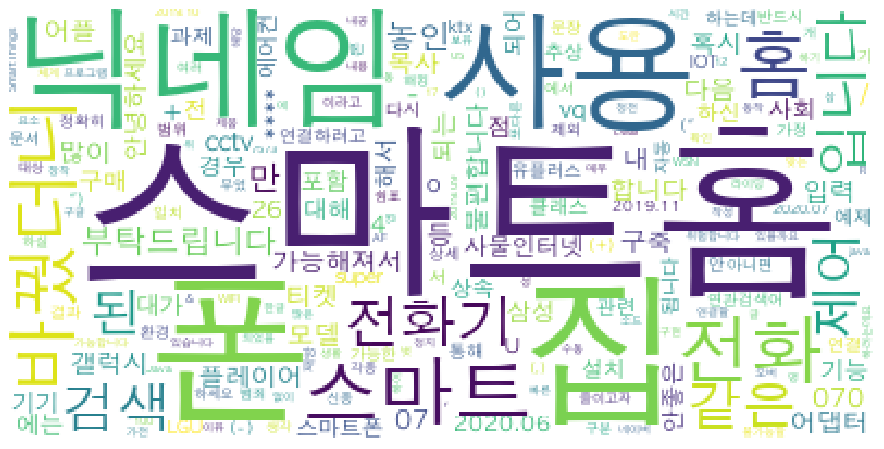

In [90]:
data = ko.vocab().most_common(300)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [91]:
mask = np.array(Image.open('mask.png'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [92]:
data = ko.vocab().most_common(200)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

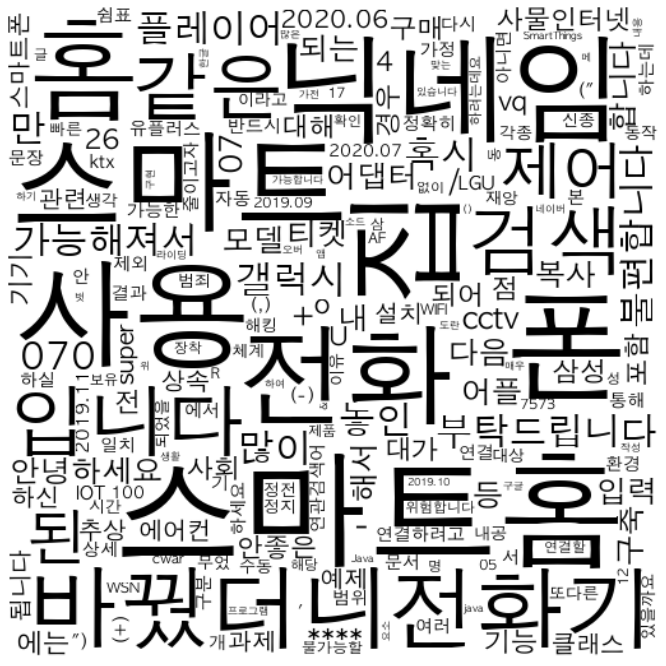

In [93]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

* gensim install : **pip install gensim**

In [169]:
!pip install gensim

     |████████████████████████████████| 24.2 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 116 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.5 MB 210 kB/s eta 0:00:011
     |████████████████████████████████| 69 kB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 547 kB 28.7 MB/s eta 0:00:01
  Created wheel for smart-open: filename=smart_open-2.1.0-py3-none-any.whl size=110317 sha256=48b6a29b7474c1040a15c2cb5f21442ed1f55349d6f322ed466ea3ac47879f0e
  Stored in directory: /Users/kyung/Library/Caches/pip/wheels/56/b5/6d/86dbe4f29d4688e5163a8b8c6b740494310040286fca4dc648
Successfully built smart-open
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


In [94]:
import gensim
from gensim.models import word2vec

In [95]:
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r= []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

/opt/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 스마트홈 구축 되다 사회 안좋다 점 2020.07 26 스마트 홈 구축 되다 사회 해킹 등 각종 신종 범죄 대상 되어다 재앙 생각 하다 또다른 안좋다 점 무었 있다 내공 100 빠르다 시간 내 부탁드리다 답변 정전 등 이유 스마트홈 체계 정지 되어다 때 수동 동작 불가능하다 경우 위험하다 닉네임 cwar
질문 스마트 홈 대해 2019.11 20 스마트 홈 정의 종류 원리 활용 대해 알다 짧다 괜찮다 답변 스마트 홈 사물인터넷 IoT 등 이용 하다 가정 내의 스마트 홈 환경 사용 가능하다 기능 들 다음 가능하다 시스템 구축 되다 환경 바로 스마트 홈 이다 닉네임 ASTRO
질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 삼성 스마트홈 어댑터 2020.06 05 삼 성 에어컨 연결하다 스마트홈 어댑터 구매 하다 어떻다 제품 에어컨 모델 명 AF 17 R 7573 WSN 이다 해당 되다 스마트홈 어댑터 확인 부탁드리다 답변 안녕하다 보유 하다 모델 WIFI 가다 기본 장착 되다 모델 이다 동 글 구매 없이 SmartThings 를 사용 하다 앱 사용 가능하다 스마트폰 맞다 어플 설치 하다 후 닉네임 삼성 생활 가전 도란 벗
질문 java 스마트홈 제어 과제 좀 부탁드리다 2019.10 07 다음 요소 구현 스마트홈 제어 Java 프로그램 작성 하다 상속 메 소드 오버 라이딩 super super

연관검색어 도움말 가정 iot 스마트홈 사물인터넷 ifa 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 스마트홈 구축 되다 사회 안좋다 점 2020.07 26 스마트 홈 구축 되다 사회 해킹 등 각종 신종 범죄 대상 되어다 재앙 생각 하다 또다른 안좋다 점 무었 있다 내공 100 빠르다 시간 내 부탁드리다 답변 정전 등 이유 스마트홈 체계 정지 되어다 때 수동 동작 불가능하다 경우 위험하다 닉네임 cwar
질문 스마트 홈 대해 2019.11 20 스마트 홈 정의 종류 원리 활용 대해 알다 짧다 괜찮다 답변 스마트 홈 사물인터넷 IoT 등 이용 하다 가정 내의 스마트 홈 환경 사용 가능하다 기능 들 다음 가능하다 시스템 구축 되다 환경 바로 스마트 홈 이다 닉네임 ASTRO
질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 삼성 스마트홈 어댑터 2020.06 05 삼 성 에어컨 연결하다 스마트홈 어댑터 구매 하다 어떻다 제품 에어컨 모델 명 AF 17 R 7573 WSN 이다 해당 되다 스마트홈 어댑터 확인 부탁드리다 답변 안녕하다 보유 하다 모델 WIFI 가다 기본 장착 되다 모델 이다 동 글 구매 없이 SmartThings 를 사용 하다 앱 사용 가능하다 스마트폰 맞다 어플 설치 하다 후 닉네임 삼성 생활 가전 도란 벗
질문 java 스마트홈 제어 과제 좀 부탁드리다 2019.

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 스마트홈 구축 되다 사회 안좋다 점 2020.07 26 스마트 홈 구축 되다 사회 해킹 등 각종 신종 범죄 대상 되어다 재앙 생각 하다 또다른 안좋다 점 무었 있다 내공 100 빠르다 시간 내 부탁드리다 답변 정전 등 이유 스마트홈 체계 정지 되어다 때 수동 동작 불가능하다 경우 위험하다 닉네임 cwar
질문 스마트 홈 대해 2019.11 20 스마트 홈 정의 종류 원리 활용 대해 알다 짧다 괜찮다 답변 스마트 홈 사물인터넷 IoT 등 이용 하다 가정 내의 스마트 홈 환경 사용 가능하다 기능 들 다음 가능하다 시스템 구축 되다 환경 바로 스마트 홈 이다 닉네임 ASTRO
질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 삼성 스마트홈 어댑터 2020.06 05 삼 성 에어컨 연결하다 스마트홈 어댑터 구매 하다 어떻다 제품 에어컨 모델 명 AF 17 R 7573 WSN 이다 해당 되다 스마트홈 어댑터 확인 부탁드리다 답변 안녕하다 보유 하다 모델 WIFI 가다 기본 장착 되다 모델 이다 동 글 구매 없이 SmartThings 를 사용 하다 앱 사용 가능하다 스마트폰 맞다 어플 설치 하다 후 닉네임 삼성 생활 가전 도란 벗
질문 java 스마트홈 제어 과제 좀 부탁드리다 2019.10 07 다음 요소 구현 스마트홈 제어 Java 프로그램 작성 하다 상속 메 소드 오버 라이딩 super super 추상 클래스 위 내용 과제 부탁드리다 추상 클래스 답

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 스마트홈 구축 되다 사회 안좋다 점 2020.07 26 스마트 홈 구축 되다 사회 해킹 등 각종 신종 범죄 대상 되어다 재앙 생각 하다 또다른 안좋다 점 무었 있다 내공 100 빠르다 시간 내 부탁드리다 답변 정전 등 이유 스마트홈 체계 정지 되어다 때 수동 동작 불가능하다 경우 위험하다 닉네임 cwar
질문 스마트 홈 대해 2019.11 20 스마트 홈 정의 종류 원리 활용 대해 알다 짧다 괜찮다 답변 스마트 홈 사물인터넷 IoT 등 이용 하다 가정 내의 스마트 홈 환경 사용 가능하다 기능 들 다음 가능하다 시스템 구축 되다 환경 바로 스마트 홈 이다 닉네임 ASTRO
질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 삼성 스마트홈 어댑터 2020.06 05 삼 성 에어컨 연결하다 스마트홈 어댑터 구매 하다 어떻다 제품 에어컨 모델 명 AF 17 R 7573 WSN 이다 해당 되다 스마트홈 어댑터 확인 부탁드리다 답변 안녕하다 보유 하다 모델 WIFI 가다 기본 장착 되다 모델 이다 동 글 구매 없이 SmartThings 를 사용 하다 앱 사용 가능하다 스마트폰 맞다 어플 설치 하다 후 닉네임 삼성 생활 가전 도란 벗
질문 java 스마트홈 제어 과제 좀 부탁드리다 2019.10 07 다음 요소 구현 스마트홈 제어 Java 프로그램 작성 하다 상속 메 소드 오버 라이딩 super super 추상 클래스 위 내용 과제 부탁드리다 추상 클래스 답

질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 삼성 스마트홈 어댑터 2020.06 05 삼 성 에어컨 연결하다 스마트홈 어댑터 구매 하다 어떻다 제품 에어컨 모델 명 AF 17 R 7573 WSN 이다 해당 되다 스마트홈 어댑터 확인 부탁드리다 답변 안녕하다 보유 하다 모델 WIFI 가다 기본 장착 되다 모델 이다 동 글 구매 없이 SmartThings 를 사용 하다 앱 사용 가능하다 스마트폰 맞다 어플 설치 하다 후 닉네임 삼성 생활 가전 도란 벗
질문 java 스마트홈 제어 과제 좀 부탁드리다 2019.10 07 다음 요소 구현 스마트홈 제어 Java 프로그램 작성 하다 상속 메 소드 오버 라이딩 super super 추상 클래스 위 내용 과제 부탁드리다 추상 클래스 답변 상속 관련 예제 한글 매우 많다 예제 있다 네이버 구글 검색 하다 하다 되다 다음 링크 그 중 하나 이다 https slowlywalk 1993 닉네임 LiferuS 2 LOVEru
질문 U 스마트홈 내 기기 연결하다 하다 2020.06 26 U 스마트홈 내 기기 연결하다 하다 다음 안 누르다 ㅠㅠ 와이파이 연결하다 하다 뜨다 않다 시리얼번호 그것 안 뜨다 다 연결 안되다 어떻다 하다 답변 안녕하다 LGU 기업 소호시 설다 원담 당 양 대리 이다 LGU 장애 고객 센터 1544-8585 로 연락 하다 바라다 그렇다 1일 인내 해결 되다 겁니다 감사하다 닉네임 헤
질문 IOT 사물인터넷 스마트 홈 관련 취업 2020.05 30 안녕하다 컴퓨터공학 재학 중 2 학년 학생 이다 진로 대해 고민 하다 아파트 엘리베이터 자동 보안 키 자동 온도 조절 장치 뭐 이런 것 

질문 java 스마트홈 제어 과제 좀 부탁드리다 2019.10 07 다음 요소 구현 스마트홈 제어 Java 프로그램 작성 하다 상속 메 소드 오버 라이딩 super super 추상 클래스 위 내용 과제 부탁드리다 추상 클래스 답변 상속 관련 예제 한글 매우 많다 예제 있다 네이버 구글 검색 하다 하다 되다 다음 링크 그 중 하나 이다 https slowlywalk 1993 닉네임 LiferuS 2 LOVEru
질문 U 스마트홈 내 기기 연결하다 하다 2020.06 26 U 스마트홈 내 기기 연결하다 하다 다음 안 누르다 ㅠㅠ 와이파이 연결하다 하다 뜨다 않다 시리얼번호 그것 안 뜨다 다 연결 안되다 어떻다 하다 답변 안녕하다 LGU 기업 소호시 설다 원담 당 양 대리 이다 LGU 장애 고객 센터 1544-8585 로 연락 하다 바라다 그렇다 1일 인내 해결 되다 겁니다 감사하다 닉네임 헤
질문 IOT 사물인터넷 스마트 홈 관련 취업 2020.05 30 안녕하다 컴퓨터공학 재학 중 2 학년 학생 이다 진로 대해 고민 하다 아파트 엘리베이터 자동 보안 키 자동 온도 조절 장치 뭐 이런 것 들 만들다 곳 답변 실제 제 살 있다 곳도 IOT 기술 적용 되다 HIOT Smart Home 스마트홈 어플 사용 하다 이 어플 통해 난방 제어 조명 제어 가스 차단 제어 닉네임 인생 멘토
질문 ktx 스마트홈 티켓 질문 2019.11 08 폰 ktx 예매 하다 크롬 사용 하다 지금 제 복사 하다 좀 번거롭다 스마트 티켓 받다 수 없다 그리고 복사 불가피하다 핸드폰 들 고도 복사 하다 답변 홈 티켓 스마트폰 상호 연동 안되다 요일 보시 수수료 없다 날다 반환 다시 발권 하다 하다 아니다 역 창구 가다 프린터 못 하다 하다 종이 승차권 닉네임 빛 예랑
질문 집 전화 스마트홈 폰 바꾸다 집 2019.12 07 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트

질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 삼성 스마트홈 어댑터 2020.06 05 삼 성 에어컨 연결하다 스마트홈 어댑터 구매 하다 어떻다 제품 에어컨 모델 명 AF 17 R 7573 WSN 이다 해당 되다 스마트홈 어댑터 확인 부탁드리다 답변 안녕하다 보유 하다 모델 WIFI 가다 기본 장착 되다 모델 이다 동 글 구매 없이 SmartThings 를 사용 하다 앱 사용 가능하다 스마트폰 맞다 어플 설치 하다 후 닉네임 삼성 생활 가전 도란 벗
질문 java 스마트홈 제어 과제 좀 부탁드리다 2019.10 07 다음 요소 구현 스마트홈 제어 Java 프로그램 작성 하다 상속 메 소드 오버 라이딩 super super 추상 클래스 위 내용 과제 부탁드리다 추상 클래스 답변 상속 관련 예제 한글 매우 많다 예제 있다 네이버 구글 검색 하다 하다 되다 다음 링크 그 중 하나 이다 https slowlywalk 1993 닉네임 LiferuS 2 LOVEru
질문 U 스마트홈 내 기기 연결하다 하다 2020.06 26 U 스마트홈 내 기기 연결하다 하다 다음 안 누르다 ㅠㅠ 와이파이 연결하다 하다 뜨다 않다 시리얼번호 그것 안 뜨다 다 연결 안되다 어떻다 하다 답변 안녕하다 LGU 기업 소호시 설다 원담 당 양 대리 이다 LGU 장애 고객 센터 1544-8585 로 연락 하다 바라다 그렇다 1일 인내 해결 되다 겁니다 감사하다 닉네임 헤
질문 IOT 사물인터넷 스마트 홈 관련 취업 2020.05 30 안녕하다 컴퓨터공학 재학 중 2 학년 학생 이다 진로 대해 고민 하다 아파트 엘리베이터 자동 보안 키 자동 온도 조절 장치 뭐 이런 것 

질문 유플러스 스마트홈 기능 2020.04 07 집 유플러스 스마트홈 cctv 비슷하다 달다 어떻다 기능 있다 답변 안녕하다 ㅎ 보통 스마트홈 cctv 같다 경우 말 그대로 cctv 역할 외부 네 크다 크다 연결 되어다 집 설치 되어다 잇다 cctv 를 통해 집 문제 있다 닉네임 콩 시기
연관검색어 도움말 가정 iot 스마트홈 사물인터넷 ifa 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 스마트홈 구축 되다 사회 안좋다 점 2020.07 26 스마트 홈 구축 되다 사회 해킹 등 각종 신종 범죄 대상 되어다 재앙 생각 하다 또다른 안좋다 점 무었 있다 내공 100 빠르다 시간 내 부탁드리다 답변 정전 등 이유 스마트홈 체계 정지 되어다 때 수동 동작 불가능하다 경우 위험하다 닉네임 cwar
질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 삼성 스마트홈 어댑터 2020.06 05 삼 성 에어컨 연결하다 스마트홈 어댑터 구매 하다 어떻다 제품 에어컨 모델 명 AF 17 R 7573 WSN 이다 해당 되다 스마트홈 어댑터 확인 부탁드리다 답변 안녕하다 보유 하다 모델 WIFI 가다 기본 장착 되다 모델 이다 동 글 구매 없이 SmartThings 를 사용 하다 앱 사용 가능하다 스마트폰 맞다 어플 설치 하다 후 닉네임 삼성 생활 가전 도란 벗
질문 java 스마트홈 제어 과제 좀 부

질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 삼성 스마트홈 어댑터 2020.06 05 삼 성 에어컨 연결하다 스마트홈 어댑터 구매 하다 어떻다 제품 에어컨 모델 명 AF 17 R 7573 WSN 이다 해당 되다 스마트홈 어댑터 확인 부탁드리다 답변 안녕하다 보유 하다 모델 WIFI 가다 기본 장착 되다 모델 이다 동 글 구매 없이 SmartThings 를 사용 하다 앱 사용 가능하다 스마트폰 맞다 어플 설치 하다 후 닉네임 삼성 생활 가전 도란 벗
질문 java 스마트홈 제어 과제 좀 부탁드리다 2019.10 07 다음 요소 구현 스마트홈 제어 Java 프로그램 작성 하다 상속 메 소드 오버 라이딩 super super 추상 클래스 위 내용 과제 부탁드리다 추상 클래스 답변 상속 관련 예제 한글 매우 많다 예제 있다 네이버 구글 검색 하다 하다 되다 다음 링크 그 중 하나 이다 https slowlywalk 1993 닉네임 LiferuS 2 LOVEru
질문 U 스마트홈 내 기기 연결하다 하다 2020.06 26 U 스마트홈 내 기기 연결하다 하다 다음 안 누르다 ㅠㅠ 와이파이 연결하다 하다 뜨다 않다 시리얼번호 그것 안 뜨다 다 연결 안되다 어떻다 하다 답변 안녕하다 LGU 기업 소호시 설다 원담 당 양 대리 이다 LGU 장애 고객 센터 1544-8585 로 연락 하다 바라다 그렇다 1일 인내 해결 되다 겁니다 감사하다 닉네임 헤
질문 IOT 사물인터넷 스마트 홈 관련 취업 2020.05 30 안녕하다 컴퓨터공학 재학 중 2 학년 학생 이다 진로 대해 고민 하다 아파트 엘리베이터 자동 보안 키 자동 온도 조절 장치 뭐 이런 것 

질문 스마트홈 구축 되다 사회 안좋다 점 2020.07 26 스마트 홈 구축 되다 사회 해킹 등 각종 신종 범죄 대상 되어다 재앙 생각 하다 또다른 안좋다 점 무었 있다 내공 100 빠르다 시간 내 부탁드리다 답변 정전 등 이유 스마트홈 체계 정지 되어다 때 수동 동작 불가능하다 경우 위험하다 닉네임 cwar
질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 삼성 스마트홈 어댑터 2020.06 05 삼 성 에어컨 연결하다 스마트홈 어댑터 구매 하다 어떻다 제품 에어컨 모델 명 AF 17 R 7573 WSN 이다 해당 되다 스마트홈 어댑터 확인 부탁드리다 답변 안녕하다 보유 하다 모델 WIFI 가다 기본 장착 되다 모델 이다 동 글 구매 없이 SmartThings 를 사용 하다 앱 사용 가능하다 스마트폰 맞다 어플 설치 하다 후 닉네임 삼성 생활 가전 도란 벗
질문 java 스마트홈 제어 과제 좀 부탁드리다 2019.10 07 다음 요소 구현 스마트홈 제어 Java 프로그램 작성 하다 상속 메 소드 오버 라이딩 super super 추상 클래스 위 내용 과제 부탁드리다 추상 클래스 답변 상속 관련 예제 한글 매우 많다 예제 있다 네이버 구글 검색 하다 하다 되다 다음 링크 그 중 하나 이다 https slowlywalk 1993 닉네임 LiferuS 2 LOVEru
질문 U 스마트홈 내 기기 연결하다 하다 2020.06 26 U 스마트홈 내 기기 연결하다 하다 다음 안 누르다 ㅠㅠ 와이파이 연결하다 하다 뜨다 않다 시리얼번호 그것 안 뜨다 다 연결 안되다 어떻다 하다 답변 안녕하다 LGU 기업 소호시 설다 원담 당 양 대리 이다 LGU 

질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 삼성 스마트홈 어댑터 2020.06 05 삼 성 에어컨 연결하다 스마트홈 어댑터 구매 하다 어떻다 제품 에어컨 모델 명 AF 17 R 7573 WSN 이다 해당 되다 스마트홈 어댑터 확인 부탁드리다 답변 안녕하다 보유 하다 모델 WIFI 가다 기본 장착 되다 모델 이다 동 글 구매 없이 SmartThings 를 사용 하다 앱 사용 가능하다 스마트폰 맞다 어플 설치 하다 후 닉네임 삼성 생활 가전 도란 벗
질문 java 스마트홈 제어 과제 좀 부탁드리다 2019.10 07 다음 요소 구현 스마트홈 제어 Java 프로그램 작성 하다 상속 메 소드 오버 라이딩 super super 추상 클래스 위 내용 과제 부탁드리다 추상 클래스 답변 상속 관련 예제 한글 매우 많다 예제 있다 네이버 구글 검색 하다 하다 되다 다음 링크 그 중 하나 이다 https slowlywalk 1993 닉네임 LiferuS 2 LOVEru
질문 U 스마트홈 내 기기 연결하다 하다 2020.06 26 U 스마트홈 내 기기 연결하다 하다 다음 안 누르다 ㅠㅠ 와이파이 연결하다 하다 뜨다 않다 시리얼번호 그것 안 뜨다 다 연결 안되다 어떻다 하다 답변 안녕하다 LGU 기업 소호시 설다 원담 당 양 대리 이다 LGU 장애 고객 센터 1544-8585 로 연락 하다 바라다 그렇다 1일 인내 해결 되다 겁니다 감사하다 닉네임 헤
질문 IOT 사물인터넷 스마트 홈 관련 취업 2020.05 30 안녕하다 컴퓨터공학 재학 중 2 학년 학생 이다 진로 대해 고민 하다 아파트 엘리베이터 자동 보안 키 자동 온도 조절 장치 뭐 이런 것 

질문 스마트홈 구축 되다 사회 안좋다 점 2020.07 26 스마트 홈 구축 되다 사회 해킹 등 각종 신종 범죄 대상 되어다 재앙 생각 하다 또다른 안좋다 점 무었 있다 내공 100 빠르다 시간 내 부탁드리다 답변 정전 등 이유 스마트홈 체계 정지 되어다 때 수동 동작 불가능하다 경우 위험하다 닉네임 cwar
질문 스마트 홈 대해 2019.11 20 스마트 홈 정의 종류 원리 활용 대해 알다 짧다 괜찮다 답변 스마트 홈 사물인터넷 IoT 등 이용 하다 가정 내의 스마트 홈 환경 사용 가능하다 기능 들 다음 가능하다 시스템 구축 되다 환경 바로 스마트 홈 이다 닉네임 ASTRO
질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 삼성 스마트홈 어댑터 2020.06 05 삼 성 에어컨 연결하다 스마트홈 어댑터 구매 하다 어떻다 제품 에어컨 모델 명 AF 17 R 7573 WSN 이다 해당 되다 스마트홈 어댑터 확인 부탁드리다 답변 안녕하다 보유 하다 모델 WIFI 가다 기본 장착 되다 모델 이다 동 글 구매 없이 SmartThings 를 사용 하다 앱 사용 가능하다 스마트폰 맞다 어플 설치 하다 후 닉네임 삼성 생활 가전 도란 벗
질문 java 스마트홈 제어 과제 좀 부탁드리다 2019.10 07 다음 요소 구현 스마트홈 제어 Java 프로그램 작성 하다 상속 메 소드 오버 라이딩 super super 추상 클래스 위 내용 과제 부탁드리다 추상 클래스 답변 상속 관련 예제 한글 매우 많다 예제 있다 네이버 구글 검색 하다 하다 되다 다음 링크 그 중 하나 이다 https slowlywalk 1993 닉네임 LiferuS 2 LOVEru
질문

질문 U 스마트홈 내 기기 연결하다 하다 2020.06 26 U 스마트홈 내 기기 연결하다 하다 다음 안 누르다 ㅠㅠ 와이파이 연결하다 하다 뜨다 않다 시리얼번호 그것 안 뜨다 다 연결 안되다 어떻다 하다 답변 안녕하다 LGU 기업 소호시 설다 원담 당 양 대리 이다 LGU 장애 고객 센터 1544-8585 로 연락 하다 바라다 그렇다 1일 인내 해결 되다 겁니다 감사하다 닉네임 헤
질문 IOT 사물인터넷 스마트 홈 관련 취업 2020.05 30 안녕하다 컴퓨터공학 재학 중 2 학년 학생 이다 진로 대해 고민 하다 아파트 엘리베이터 자동 보안 키 자동 온도 조절 장치 뭐 이런 것 들 만들다 곳 답변 실제 제 살 있다 곳도 IOT 기술 적용 되다 HIOT Smart Home 스마트홈 어플 사용 하다 이 어플 통해 난방 제어 조명 제어 가스 차단 제어 닉네임 인생 멘토
질문 ktx 스마트홈 티켓 질문 2019.11 08 폰 ktx 예매 하다 크롬 사용 하다 지금 제 복사 하다 좀 번거롭다 스마트 티켓 받다 수 없다 그리고 복사 불가피하다 핸드폰 들 고도 복사 하다 답변 홈 티켓 스마트폰 상호 연동 안되다 요일 보시 수수료 없다 날다 반환 다시 발권 하다 하다 아니다 역 창구 가다 프린터 못 하다 하다 종이 승차권 닉네임 빛 예랑
질문 집 전화 스마트홈 폰 바꾸다 집 2019.12 07 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 유플러스 스마트홈 기능 2020.04 07 집 유플러스 스마트홈 cctv 비슷하다 달다 어떻다 기능 있다 답변 안녕하다 ㅎ 보통 스마트홈 cctv 같다 경우 말 그대로 cctv 역할 외부 네 크다 크다 연결 되어다 집 설치 되어다 잇다 cctv 를 통해 집 문제 있

질문 java 스마트홈 제어 과제 좀 부탁드리다 2019.10 07 다음 요소 구현 스마트홈 제어 Java 프로그램 작성 하다 상속 메 소드 오버 라이딩 super super 추상 클래스 위 내용 과제 부탁드리다 추상 클래스 답변 상속 관련 예제 한글 매우 많다 예제 있다 네이버 구글 검색 하다 하다 되다 다음 링크 그 중 하나 이다 https slowlywalk 1993 닉네임 LiferuS 2 LOVEru
질문 U 스마트홈 내 기기 연결하다 하다 2020.06 26 U 스마트홈 내 기기 연결하다 하다 다음 안 누르다 ㅠㅠ 와이파이 연결하다 하다 뜨다 않다 시리얼번호 그것 안 뜨다 다 연결 안되다 어떻다 하다 답변 안녕하다 LGU 기업 소호시 설다 원담 당 양 대리 이다 LGU 장애 고객 센터 1544-8585 로 연락 하다 바라다 그렇다 1일 인내 해결 되다 겁니다 감사하다 닉네임 헤
질문 IOT 사물인터넷 스마트 홈 관련 취업 2020.05 30 안녕하다 컴퓨터공학 재학 중 2 학년 학생 이다 진로 대해 고민 하다 아파트 엘리베이터 자동 보안 키 자동 온도 조절 장치 뭐 이런 것 들 만들다 곳 답변 실제 제 살 있다 곳도 IOT 기술 적용 되다 HIOT Smart Home 스마트홈 어플 사용 하다 이 어플 통해 난방 제어 조명 제어 가스 차단 제어 닉네임 인생 멘토
질문 ktx 스마트홈 티켓 질문 2019.11 08 폰 ktx 예매 하다 크롬 사용 하다 지금 제 복사 하다 좀 번거롭다 스마트 티켓 받다 수 없다 그리고 복사 불가피하다 핸드폰 들 고도 복사 하다 답변 홈 티켓 스마트폰 상호 연동 안되다 요일 보시 수수료 없다 날다 반환 다시 발권 하다 하다 아니다 역 창구 가다 프린터 못 하다 하다 종이 승차권 닉네임 빛 예랑
질문 집 전화 스마트홈 폰 바꾸다 집 2019.12 07 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트

질문 집 전화 스마트홈 폰 바꾸다 집 2019.12 07 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 유플러스 스마트홈 기능 2020.04 07 집 유플러스 스마트홈 cctv 비슷하다 달다 어떻다 기능 있다 답변 안녕하다 ㅎ 보통 스마트홈 cctv 같다 경우 말 그대로 cctv 역할 외부 네 크다 크다 연결 되어다 집 설치 되어다 잇다 cctv 를 통해 집 문제 있다 닉네임 콩 시기
질문 nugu 스마트홈 3일 전 제 실수 nugu 스마트홈 회원 가입 해 버리다 이 거 돈 빠져나가다 서비스 아니다 답변 스마트홈 기기 구매 하다 아니다 결제 되다 것 없다 닉네임 lbg 1
연관검색어 도움말 가정 iot 스마트홈 사물인터넷 ifa 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 스마트홈 구축 되다 사회 안좋다 점 2020.07 26 스마트 홈 구축 되다 사회 해킹 등 각종 신종 범죄 대상 되어다 재앙 생각 하다 또다른 안좋다 점 무었 있다 내공 100 빠르다 시간 내 부탁드리다 답변 정전 등 이유 스마트홈 체계 정지 되어다 때 수동 동작 불가능하다 경우 위험하다 닉네임 cwar
질문 스마트 홈 대해 2019.11 20 스마트 홈 정의 종류 원리 활용 대해 알다 짧다 괜찮다 답변 스마트 홈 사물인터넷 IoT 등 이용 하다 가정 내의 스마트 홈 환경 사용 가능하다 기능 들 다음 가능하다 시스템 구축 되다 환경 바로 스마트 홈 이다 닉네임 

질문 집 전화 스마트홈 폰 바꾸다 집 2019.12 07 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 유플러스 스마트홈 기능 2020.04 07 집 유플러스 스마트홈 cctv 비슷하다 달다 어떻다 기능 있다 답변 안녕하다 ㅎ 보통 스마트홈 cctv 같다 경우 말 그대로 cctv 역할 외부 네 크다 크다 연결 되어다 집 설치 되어다 잇다 cctv 를 통해 집 문제 있다 닉네임 콩 시기
연관검색어 도움말 가정 iot 스마트홈 사물인터넷 ifa 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 스마트홈 구축 되다 사회 안좋다 점 2020.07 26 스마트 홈 구축 되다 사회 해킹 등 각종 신종 범죄 대상 되어다 재앙 생각 하다 또다른 안좋다 점 무었 있다 내공 100 빠르다 시간 내 부탁드리다 답변 정전 등 이유 스마트홈 체계 정지 되어다 때 수동 동작 불가능하다 경우 위험하다 닉네임 cwar
질문 스마트 홈 대해 2019.11 20 스마트 홈 정의 종류 원리 활용 대해 알다 짧다 괜찮다 답변 스마트 홈 사물인터넷 IoT 등 이용 하다 가정 내의 스마트 홈 환경 사용 가능하다 기능 들 다음 가능하다 시스템 구축 되다 환경 바로 스마트 홈 이다 닉네임 ASTRO
질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 스마트홈 구축 되다 사회 안좋다 점 2020.07 26 스마트 홈 구축 되다 사회 해킹 등 각종 신종 범죄 대상 되어다 재앙 생각 하다 또다른 안좋다 점 무었 있다 내공 100 빠르다 시간 내 부탁드리다 답변 정전 등 이유 스마트홈 체계 정지 되어다 때 수동 동작 불가능하다 경우 위험하다 닉네임 cwar
질문 스마트 홈 대해 2019.11 20 스마트 홈 정의 종류 원리 활용 대해 알다 짧다 괜찮다 답변 스마트 홈 사물인터넷 IoT 등 이용 하다 가정 내의 스마트 홈 환경 사용 가능하다 기능 들 다음 가능하다 시스템 구축 되다 환경 바로 스마트 홈 이다 닉네임 ASTRO
질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 삼성 스마트홈 어댑터 2020.06 05 삼 성 에어컨 연결하다 스마트홈 어댑터 구매 하다 어떻다 제품 에어컨 모델 명 AF 17 R 7573 WSN 이다 해당 되다 스마트홈 어댑터 확인 부탁드리다 답변 안녕하다 보유 하다 모델 WIFI 가다 기본 장착 되다 모델 이다 동 글 구매 없이 SmartThings 를 사용 하다 앱 사용 가능하다 스마트폰 맞다 어플 설치 하다 후 닉네임 삼성 생활 가전 도란 벗
질문 java 스마트홈 제어 과제 좀 부탁드리다 2019.10 07 다음 요소 구현 스마트홈 제어 Java 프로그램 작성 하다 상속 메 소드 오버 라이딩 super super 추상 클래스 위 내용 과제 부탁드리다 추상 클래스 답

질문 U 스마트홈 내 기기 연결하다 하다 2020.06 26 U 스마트홈 내 기기 연결하다 하다 다음 안 누르다 ㅠㅠ 와이파이 연결하다 하다 뜨다 않다 시리얼번호 그것 안 뜨다 다 연결 안되다 어떻다 하다 답변 안녕하다 LGU 기업 소호시 설다 원담 당 양 대리 이다 LGU 장애 고객 센터 1544-8585 로 연락 하다 바라다 그렇다 1일 인내 해결 되다 겁니다 감사하다 닉네임 헤
질문 IOT 사물인터넷 스마트 홈 관련 취업 2020.05 30 안녕하다 컴퓨터공학 재학 중 2 학년 학생 이다 진로 대해 고민 하다 아파트 엘리베이터 자동 보안 키 자동 온도 조절 장치 뭐 이런 것 들 만들다 곳 답변 실제 제 살 있다 곳도 IOT 기술 적용 되다 HIOT Smart Home 스마트홈 어플 사용 하다 이 어플 통해 난방 제어 조명 제어 가스 차단 제어 닉네임 인생 멘토
질문 ktx 스마트홈 티켓 질문 2019.11 08 폰 ktx 예매 하다 크롬 사용 하다 지금 제 복사 하다 좀 번거롭다 스마트 티켓 받다 수 없다 그리고 복사 불가피하다 핸드폰 들 고도 복사 하다 답변 홈 티켓 스마트폰 상호 연동 안되다 요일 보시 수수료 없다 날다 반환 다시 발권 하다 하다 아니다 역 창구 가다 프린터 못 하다 하다 종이 승차권 닉네임 빛 예랑
질문 집 전화 스마트홈 폰 바꾸다 집 2019.12 07 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 유플러스 스마트홈 기능 2020.04 07 집 유플러스 스마트홈 cctv 비슷하다 달다 어떻다 기능 있다 답변 안녕하다 ㅎ 보통 스마트홈 cctv 같다 경우 말 그대로 cctv 역할 외부 네 크다 크다 연결 되어다 집 설치 되어다 잇다 cctv 를 통해 집 문제 있

질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 삼성 스마트홈 어댑터 2020.06 05 삼 성 에어컨 연결하다 스마트홈 어댑터 구매 하다 어떻다 제품 에어컨 모델 명 AF 17 R 7573 WSN 이다 해당 되다 스마트홈 어댑터 확인 부탁드리다 답변 안녕하다 보유 하다 모델 WIFI 가다 기본 장착 되다 모델 이다 동 글 구매 없이 SmartThings 를 사용 하다 앱 사용 가능하다 스마트폰 맞다 어플 설치 하다 후 닉네임 삼성 생활 가전 도란 벗
질문 java 스마트홈 제어 과제 좀 부탁드리다 2019.10 07 다음 요소 구현 스마트홈 제어 Java 프로그램 작성 하다 상속 메 소드 오버 라이딩 super super 추상 클래스 위 내용 과제 부탁드리다 추상 클래스 답변 상속 관련 예제 한글 매우 많다 예제 있다 네이버 구글 검색 하다 하다 되다 다음 링크 그 중 하나 이다 https slowlywalk 1993 닉네임 LiferuS 2 LOVEru
질문 U 스마트홈 내 기기 연결하다 하다 2020.06 26 U 스마트홈 내 기기 연결하다 하다 다음 안 누르다 ㅠㅠ 와이파이 연결하다 하다 뜨다 않다 시리얼번호 그것 안 뜨다 다 연결 안되다 어떻다 하다 답변 안녕하다 LGU 기업 소호시 설다 원담 당 양 대리 이다 LGU 장애 고객 센터 1544-8585 로 연락 하다 바라다 그렇다 1일 인내 해결 되다 겁니다 감사하다 닉네임 헤
질문 IOT 사물인터넷 스마트 홈 관련 취업 2020.05 30 안녕하다 컴퓨터공학 재학 중 2 학년 학생 이다 진로 대해 고민 하다 아파트 엘리베이터 자동 보안 키 자동 온도 조절 장치 뭐 이런 것 

연관검색어 도움말 가정 iot 스마트홈 사물인터넷 ifa 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 스마트홈 구축 되다 사회 안좋다 점 2020.07 26 스마트 홈 구축 되다 사회 해킹 등 각종 신종 범죄 대상 되어다 재앙 생각 하다 또다른 안좋다 점 무었 있다 내공 100 빠르다 시간 내 부탁드리다 답변 정전 등 이유 스마트홈 체계 정지 되어다 때 수동 동작 불가능하다 경우 위험하다 닉네임 cwar
질문 스마트 홈 대해 2019.11 20 스마트 홈 정의 종류 원리 활용 대해 알다 짧다 괜찮다 답변 스마트 홈 사물인터넷 IoT 등 이용 하다 가정 내의 스마트 홈 환경 사용 가능하다 기능 들 다음 가능하다 시스템 구축 되다 환경 바로 스마트 홈 이다 닉네임 ASTRO
질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 삼성 스마트홈 어댑터 2020.06 05 삼 성 에어컨 연결하다 스마트홈 어댑터 구매 하다 어떻다 제품 에어컨 모델 명 AF 17 R 7573 WSN 이다 해당 되다 스마트홈 어댑터 확인 부탁드리다 답변 안녕하다 보유 하다 모델 WIFI 가다 기본 장착 되다 모델 이다 동 글 구매 없이 SmartThings 를 사용 하다 앱 사용 가능하다 스마트폰 맞다 어플 설치 하다 후 닉네임 삼성 생활 가전 도란 벗
질문 java 스마트홈 제어 과제 좀 부탁드리다 2019.

질문 ktx 스마트홈 티켓 질문 2019.11 08 폰 ktx 예매 하다 크롬 사용 하다 지금 제 복사 하다 좀 번거롭다 스마트 티켓 받다 수 없다 그리고 복사 불가피하다 핸드폰 들 고도 복사 하다 답변 홈 티켓 스마트폰 상호 연동 안되다 요일 보시 수수료 없다 날다 반환 다시 발권 하다 하다 아니다 역 창구 가다 프린터 못 하다 하다 종이 승차권 닉네임 빛 예랑
질문 집 전화 스마트홈 폰 바꾸다 집 2019.12 07 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 유플러스 스마트홈 기능 2020.04 07 집 유플러스 스마트홈 cctv 비슷하다 달다 어떻다 기능 있다 답변 안녕하다 ㅎ 보통 스마트홈 cctv 같다 경우 말 그대로 cctv 역할 외부 네 크다 크다 연결 되어다 집 설치 되어다 잇다 cctv 를 통해 집 문제 있다 닉네임 콩 시기
연관검색어 도움말 가정 iot 스마트홈 사물인터넷 ifa 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 스마트홈 구축 되다 사회 안좋다 점 2020.07 26 스마트 홈 구축 되다 사회 해킹 등 각종 신종 범죄 대상 되어다 재앙 생각 하다 또다른 안좋다 점 무었 있다 내공 100 빠르다 시간 내 부탁드리다 답변 정전 등 이유 스마트홈 체계 정지 되어다 때 수동 동작 불가능하다 경우 위험하다 닉네임 cwar
질문 스마트 홈 대해 2019.11 20 스마트 홈 정의 종류 원리 활용 대해 알다 짧

질문 유플러스 스마트홈 기능 2020.04 07 집 유플러스 스마트홈 cctv 비슷하다 달다 어떻다 기능 있다 답변 안녕하다 ㅎ 보통 스마트홈 cctv 같다 경우 말 그대로 cctv 역할 외부 네 크다 크다 연결 되어다 집 설치 되어다 잇다 cctv 를 통해 집 문제 있다 닉네임 콩 시기
연관검색어 도움말 가정 iot 스마트홈 사물인터넷 ifa 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 스마트홈 구축 되다 사회 안좋다 점 2020.07 26 스마트 홈 구축 되다 사회 해킹 등 각종 신종 범죄 대상 되어다 재앙 생각 하다 또다른 안좋다 점 무었 있다 내공 100 빠르다 시간 내 부탁드리다 답변 정전 등 이유 스마트홈 체계 정지 되어다 때 수동 동작 불가능하다 경우 위험하다 닉네임 cwar
질문 스마트 홈 대해 2019.11 20 스마트 홈 정의 종류 원리 활용 대해 알다 짧다 괜찮다 답변 스마트 홈 사물인터넷 IoT 등 이용 하다 가정 내의 스마트 홈 환경 사용 가능하다 기능 들 다음 가능하다 시스템 구축 되다 환경 바로 스마트 홈 이다 닉네임 ASTRO
질문 집 전화 스마트홈 폰 바꾸다 집 2019.09 12 집 전화 스마트홈 폰 바꾸다 집 전화기 1 대가 되다 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전화기 답변 집 전화 스마트홈 폰 바꾸다 집 전화기 놓이다 스마트홈 폰 사용 가능하다 많이 불편하다 혹시 갤럭시 플레이어 같다 스마트홈 폰 070 전 닉네임 vq 4 o
질문 삼성 스마트홈 어댑터 2020.06 05 삼 성 에어컨 연결하다 스마트홈 어댑터 구매 하다 어떻다 제품 에어컨 모델 명 AF 17 R 7573 WSN 이다 해당 되다 스마트홈 

In [96]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [97]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, 
                                                                        min_count=2, sg=1)
model.save('pres_girl.model')

In [98]:
model = word2vec.Word2Vec.load("pres_girl.model")

In [105]:
model.most_similar(positive=['스마트'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('홈', 0.7839435338973999),
 ('구축', 0.6120926141738892),
 ('환경', 0.5187620520591736),
 ('이용', 0.5131453275680542),
 ('종류', 0.49660417437553406),
 ('정의', 0.4961894452571869),
 ('원리', 0.49523410201072693),
 ('활용', 0.49236178398132324),
 ('바로', 0.49091705679893494),
 ('각종', 0.4701988995075226)]

In [106]:
model.most_similar(negative=['스마트'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('시기', 0.0712859034538269),
 ('답변', 0.056099433451890945),
 ('기본', 0.05380108207464218),
 ('콩', 0.023298121988773346),
 ('설치', 0.023017756640911102),
 ('닉네임', 0.015393000096082687),
 ('보유', 0.00995703786611557),
 ('를', 0.006002027541399002),
 ('어플', 0.0020049139857292175),
 ('문제', -0.003099992871284485)]